Computer: server
Computer: server
/experiment/export_data/data_play/KPawakeM72_014_001_cell.mat
['KPawakeM72_014_a_001']
/experiment/export_data/data_play/KPawakeM72_014_004_cell.mat
['KPawakeM72_014_a_004']
/experiment/export_data/data_play/KPawakeM72_014_006_cell.mat
['KPawakeM72_014_a_006']
/experiment/export_data/data_play/KPawakeM72_014_007_cell.mat
['KPawakeM72_014_a_007']
/experiment/export_data/data_play/KPawakeM72_014_012_cell.mat
['KPawakeM72_014_c_012', 'KPawakeM72_014_b_012']
/experiment/export_data/data_play/KPawakeM72_014_017_cell.mat
['KPawakeM72_014_b_017']
/experiment/export_data/data_play/KPawakeM72_016_001_cell.mat
['KPawakeM72_016_a_001']
/experiment/export_data/data_play/KPawakeM72_016_005_cell.mat
['KPawakeM72_016_a_005']
/experiment/export_data/data_play/KPawakeM72_016_006_cell.mat
['KPawakeM72_016_a_006']
/experiment/export_data/data_play/KPawakeM72_016_007_cell.mat
['KPawakeM72_016_a_007']
/experiment/export_data/data_play/KPawakeM72_016_008_cell.mat
['KPawakeM

data_handling/data_load.py:131: ComplexWarning: Casting complex values to real discards the imaginary part
  sniffs[i_sniff]['t_zer_fit'] = np.array(sniff_struct.t_zer_fit, dtype=np.float)
data_handling/data_load.py:132: ComplexWarning: Casting complex values to real discards the imaginary part
  sniffs[i_sniff]['inh_len'] = sniff_struct.t_zer_fit[1]-sniff_struct.t_zer[0]
data_handling/data_load.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  sniffs[i_sniff]['exh_len'] = sniff_struct.t_zer[2] - sniff_struct.t_zer_fit[1]
data_handling/data_load.py:191: ComplexWarning: Casting complex values to real discards the imaginary part
  'sniff_zero' : np.array(x.spZeros, dtype=np.int)



/experiment/export_data/data_play/KPawakeM72_019_010_cell.mat
['KPawakeM72_019_d_010', 'KPawakeM72_019_a_010']
/experiment/export_data/data_play/KPawakeM72_019_011_cell.mat
['KPawakeM72_019_a_011', 'KPawakeM72_019_d_011']
/experiment/export_data/data_play/KPawakeM72_019_013_cell.mat
['KPawakeM72_019_a_013', 'KPawakeM72_019_d_013']
/experiment/export_data/data_play/KPawakeM72_019_014_cell.mat
['KPawakeM72_019_d_014', 'KPawakeM72_019_a_014']
/experiment/export_data/data_play/KPawakeM72_019_015_cell.mat
['KPawakeM72_019_a_015', 'KPawakeM72_019_d_015']
/experiment/export_data/data_play/KPawakeM72_019_018_cell.mat
['KPawakeM72_019_d_018', 'KPawakeM72_019_a_018']
/experiment/export_data/data_play/KPawakeM72_019_020_cell.mat
['KPawakeM72_019_b_020']
/experiment/export_data/data_play/KPawakeM72_019_021_cell.mat
['KPawakeM72_019_b_021']
/experiment/export_data/data_play/KPawakeM72_021_001_cell.mat
['KPawakeM72_021_a_001', 'KPawakeM72_021_b_001']
/experiment/export_data/data_play/KPawakeM72_021

ValueError: array of sample points is empty

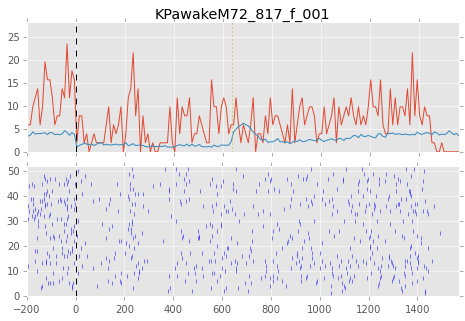

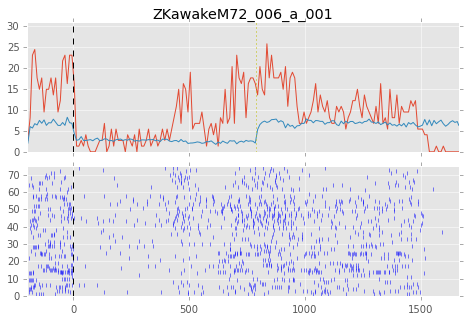

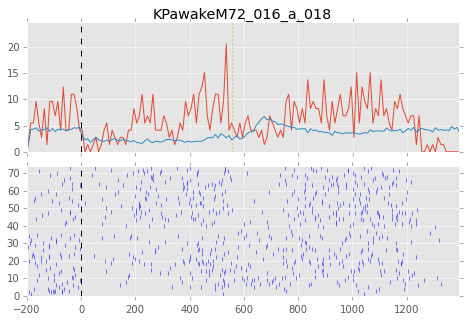

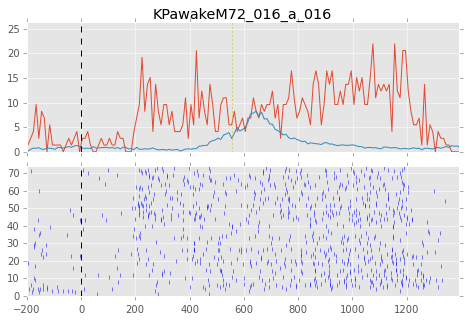

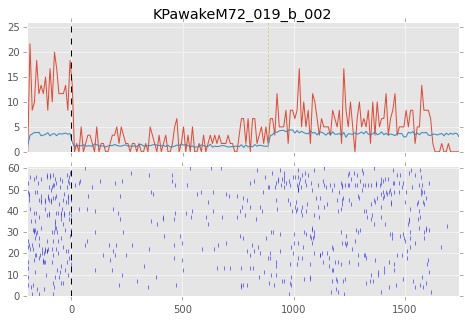

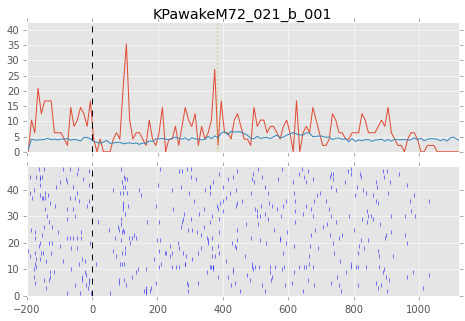

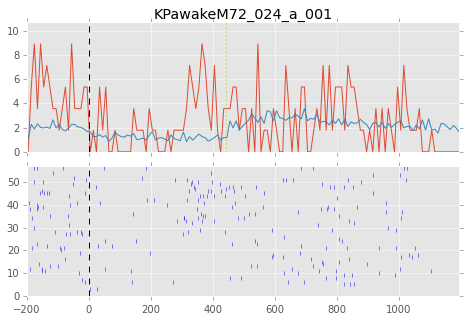

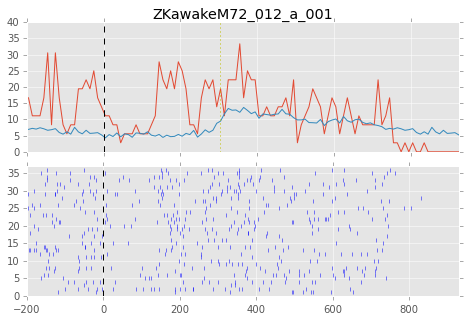

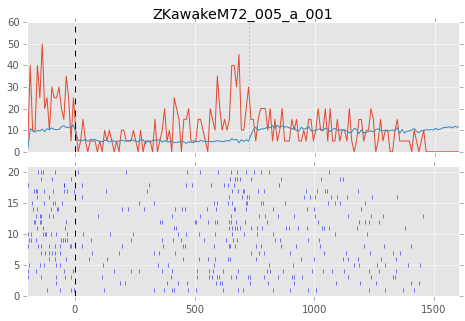

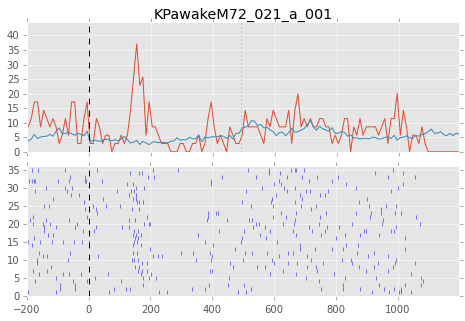

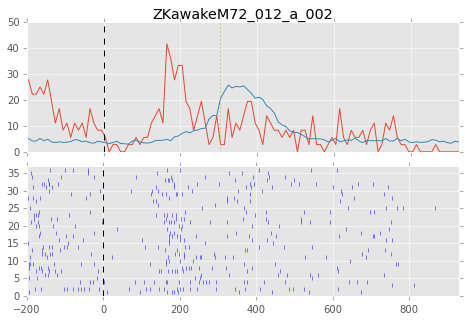

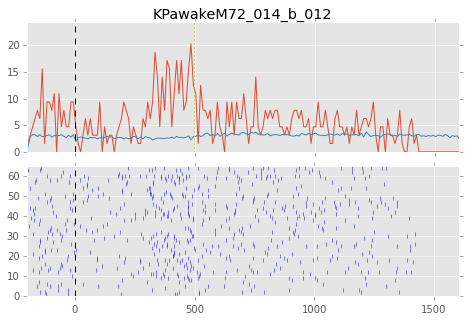

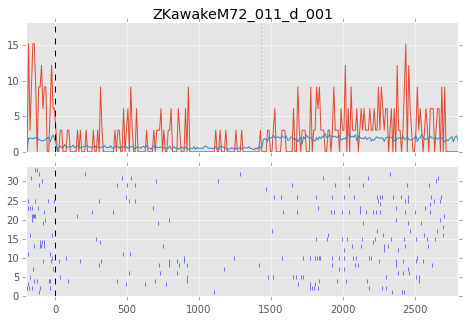

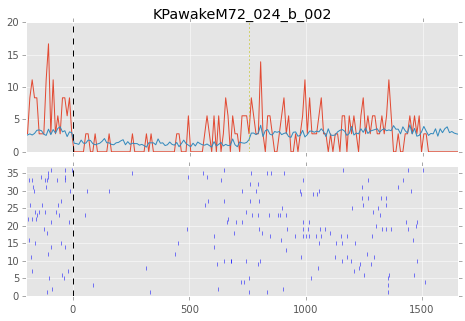

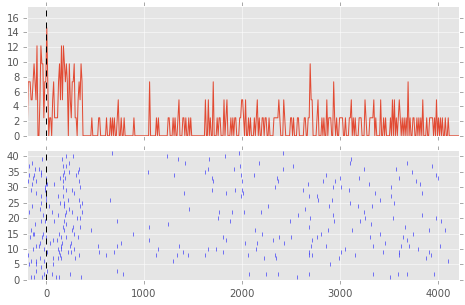

In [1]:
%matplotlib inline
from __future__ import division
import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os

matplotlib.style.use('ggplot')

comp_name=socket.gethostname()
if  comp_name == 'Ezequiels-MacBook-Pro.local':
    print 'Computer: ' + comp_name
    sys.path.append('/Users/zeke/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/Users','zeke','experiment')
else:
    print 'Computer: ' + 'server'
    sys.path.append('/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/','experiment')
    
import unitToolsv2
from data_handling import ephys_names as en
from data_handling.basic_plot import decim, plot_raster, make_psth, col_binned
from data_handling import data_load as dl
from analysis import stimulus as st

#load all the records, to not load all the records for every stimulus
fn = en.file_names(root = experiment_folder)
cells_path = os.path.join(fn.fold_exp_data, 'data_play')
all_records = dl.load_cells(cells_path)

## create a stimulus and initialize it (load its responses)
high_2hydroxy = st.Odor(['2-hydroxyacetophenone','2hydroxyacetophenone'], 0.0051)
st_1 = st.Stimulus(high_2hydroxy, records = all_records, tags = {'light':1} )
#get the first response and plot it
[r.plot(warped=True) for r in list(st_1.responses.values())]
#st_1.responses['ZKawakeM72_013_e_010'].plot(warped=False)

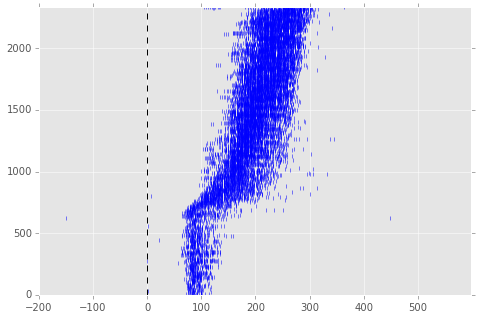

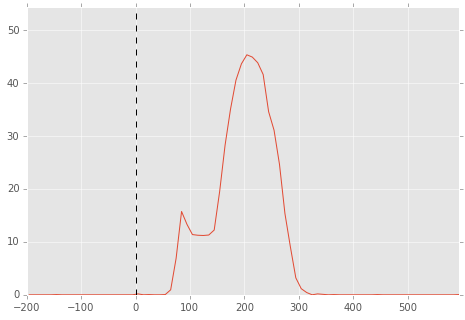

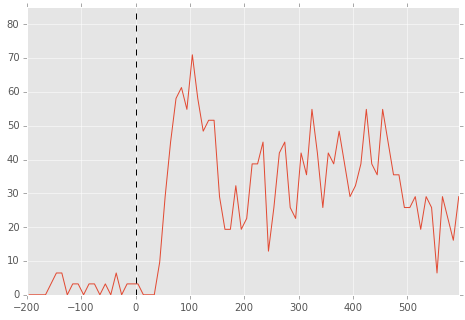

In [5]:
mat_file_path='/Users/zeke/experiment/export_data/ZKawakeM72_013_e_011_spikes.mat'
assert(os.path.isfile(mat_file_path))
print (mat_file_path)
spike_data = sio.loadmat(mat_file_path, struct_as_record=False, squeeze_me=True)
spikes_loaded = spike_data['thisUnit']
all_spikes = np.array(spikes_loaded.times, dtype=np.float)

/Users/zeke/experiment/export_data/ZKawakeM72_013_e_011_spikes.mat


In [4]:
# initialize ipython "cluster" first.
# this connects client to the cluster workers.

from IPython.parallel import Client
C = Client(profile='default')
lbv = C.load_balanced_view()

In [47]:
# I'm defining the draw_and_mean as a nested function here because

def parfunc(stimulus_sa, baseline_sa):
    """
    stimulus_sa: numpy array of shape (n_bins, n_trials)
    
    """
    import numpy as np
    from scipy.stats import ks_2samp
    
    def draw_and_mean(spike_array, n_bs, n_trials):
        # draw= np.empty_like(bl_sa)
        draw_indexes = np.random.randint(0, spike_array.shape[1]-1, (n_bs, n_trials))
        psths = np.empty((n_bs, spike_array.shape[0]))
        for i in xrange(n_bs):
            draw_is = draw_indexes[i]
            draw = spike_array[:, draw_is]
            psths[i, :] = draw.mean(axis=1)
        return psths
    
    """
    spike arrays are each numpy.array of shape (n_bins, n_trials) (for baseline it's actually n_sniffs instead of trials)
    spike arrays here are normalized (Hz).
    """
    assert(stimulus_sa.shape[0]==baseline_sa.shape[0])
    
    response_mean = stimulus_sa.mean(axis=1)
    ntr = stimulus_sa.shape[1] # number of trials in stimulus.
    baseline_boot = draw_and_mean(baseline_sa, 100000, ntr)

    ps = np.empty_like(response_mean)
    ks = np.empty_like(response_mean)
    kst = np.empty_like(response_mean)
    for j in xrange(len(response_mean)):
        r = response_mean[j]
        base = baseline_boot[:, j]
    #     print base.shape
        p = np.sum(base >= r)/len(base)
        ps[j] = p
        kst[j], ks[j] = ks_2samp(stimulus_sa[j,:],baseline_sa[j,:])
    ps = np.asarray(ps)
    

    
    return ps, baseline_boot, ks, kst

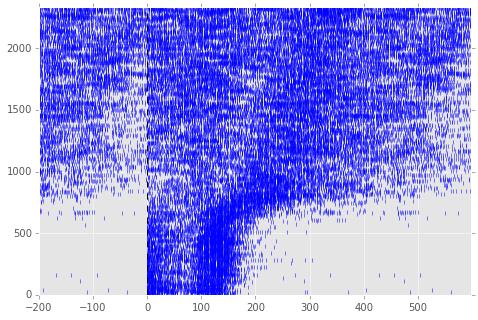

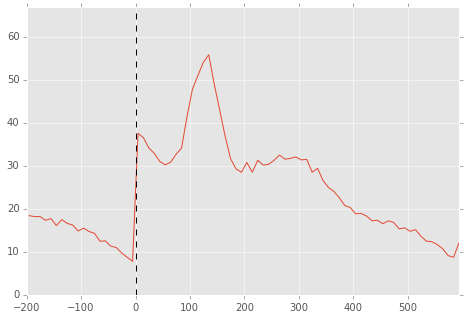

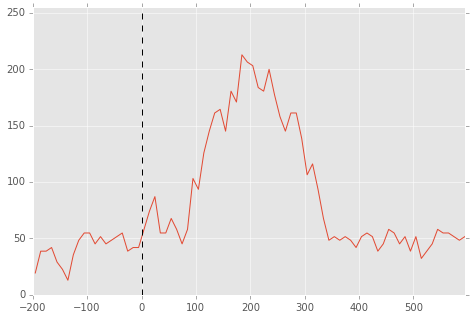

In [43]:
rec_name = 'ZKawakeM72_013_e_011'
r0=st_1.responses[rec_name]
rst = r0.make_raster(warped=False)
#plot_raster(rst, t0=200)
#plot_raster(rst, bin_size=10, t0=200)
bl=r0.baseline.make_raster(t_pre=200, t_post=800, warped=False)
plot_raster(bl, t0=200)
plot_raster(bl, t0=200, bin_size=10)
plot_raster(rst, t0=200, bin_size=10)
bin_size = 10
events   = bl.shape[0]
t_stamps = bl.shape[1]
t=np.arange(t_stamps)-200
t_dec = decim(t, bin_size)



120


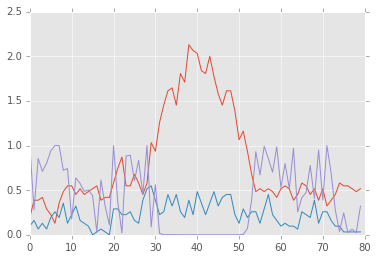

In [48]:
bin_size = 10
rst_sa = col_binned(rst, bin_size).transpose()
bl_sa = col_binned(bl,bin_size).transpose()
ps, psths, ks, kst = parfunc(rst_sa, bl_sa)
response_mean = rst.transpose().mean(axis=1)
import itertools
plt.plot(rst_sa.mean(axis=1))
plt.plot(psths[800//bin_size, :])
#plt.plot(psths.mean(axis=0))
plt.plot(ks)
#find first ks<p
p=0.01
seq = ks<p
onset = next(i for i in range(len(ks)) if ks[i]<p)
print onset*bin_size-200

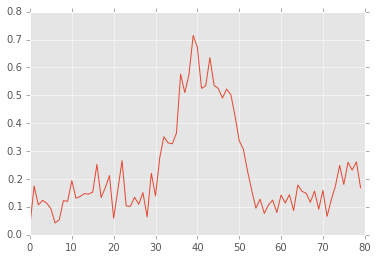

In [50]:
plt.plot(kst)

370


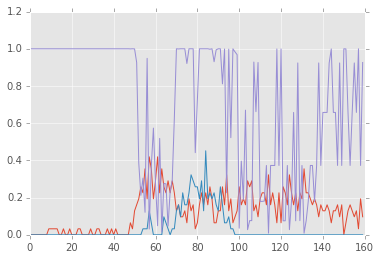

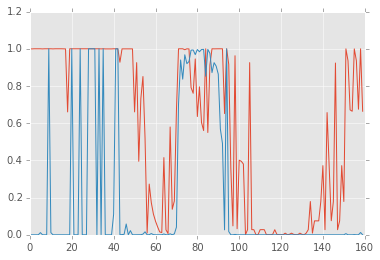

In [8]:
plt.plot(ks)
plt.plot(ps)

In [39]:
print min(ps[0:26])
print min(ks[0:26])

0.0
0.660645191248


In [40]:
print min(ps[20:60])
print min(ks[20:60])

0.0
0.00958797048124


(<matplotlib.collections.PathCollection at 0x117324750>,
 <matplotlib.axes._axes.Axes at 0x1172eed90>)

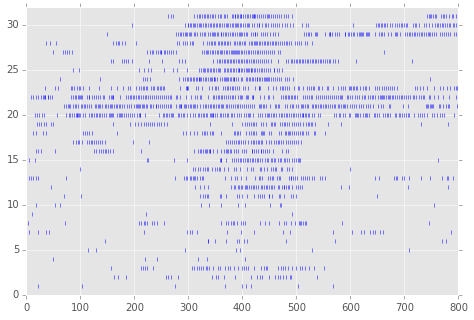

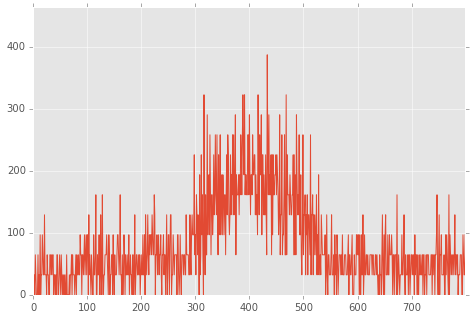

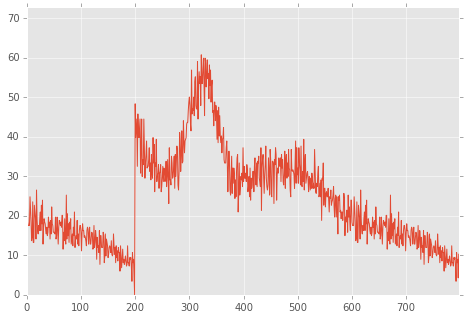

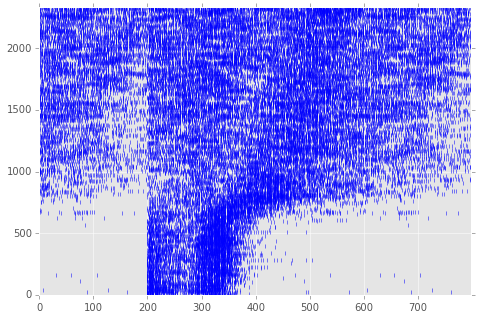

In [51]:
rec_name = 'ZKawakeM72_013_e_011'
r0=st_1.responses[rec_name]
rst = r0.make_raster(t_pre=200, t_post=600, warped=False)
plot_raster(rst, t0=0)
plot_raster(rst, bin_size=1, t0=0)
bl=r0.baseline.make_raster(t_pre=200, t_post=600, warped=False)
plot_raster(bl, bin_size=1, t0=0)
plot_raster(bl, t0=0)

#get the p values for the raster

In [2]:
a = np.arange(28).reshape((4,7))
print a

print col_binned(a, 4)


[[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]]
[[  6.  15.]
 [ 34.  36.]
 [ 62.  57.]
 [ 90.  78.]]
